In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

file_path = 'C:/Users/ADMIN/Downloads/Cars.csv'
cars = pd.read_csv(file_path)
print(cars.shape)
print(cars.describe())
print(cars.head())
print(cars.info())
print(cars.corr())
print(cars.isna().sum())

Error reading the CSV file: [Errno 2] No such file or directory: 'C:/Users/ADMIN/Downloads/car_price_dataset.csv'


AttributeError: 'NoneType' object has no attribute 'head'

In [2]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


In [3]:
import statsmodels.formula.api as smf
model = smf.ols('MPG~WT+VOL+SP+HP', data=cars).fit()

In [4]:
model.params

Intercept    30.677336
WT            0.400574
VOL          -0.336051
SP            0.395627
HP           -0.205444
dtype: float64

In [5]:
print(model.tvalues, '\n', model.pvalues)

Intercept    2.058841
WT           0.236541
VOL         -0.590970
SP           2.499880
HP          -5.238735
dtype: float64 
 Intercept    0.042936
WT           0.813649
VOL          0.556294
SP           0.014579
HP           0.000001
dtype: float64


In [6]:
(model.rsquared, model.rsquared_adj)

(0.7705372737359844, 0.7584602881431415)

In [7]:
ml_v = smf.ols('MPG~VOL', data = cars).fit()
print(ml_v.tvalues, '\n', ml_v.pvalues)

Intercept    14.106056
VOL          -5.541400
dtype: float64 
 Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


In [8]:
import statsmodels.formula.api as smf
import pandas as pd

file_path = 'C:/Users/ADMIN/Downloads/Cars.csv'
cars = pd.read_csv(file_path)

rsq_hp = smf.ols('HP ~ WT + VOL + SP', data=cars).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_wt = smf.ols('WT ~ HP + VOL + SP', data=cars).fit().rsquared
vif_wt = 1/(1-rsq_wt)

rsq_vol = smf.ols('VOL ~ WT + SP + HP', data=cars).fit().rsquared
vif_vol = 1/(1-rsq_vol)

rsq_sp = smf.ols('SP ~ WT + VOL + HP', data=cars).fit().rsquared
vif_sp = 1/(1-rsq_sp)

vif_data = {
    'Variable': ['HP', 'WT', 'VOL', 'SP'],
    'VIF': [vif_hp, vif_wt, vif_vol, vif_sp]
}

vif_df = pd.DataFrame(vif_data)

print(vif_df)

  Variable         VIF
0       HP   19.926589
1       WT  639.533818
2      VOL  638.806084
3       SP   20.007639


In [12]:
sns.pairplot(cars)


AttributeError: module 'seaborn' has no attribute 'pairplot'

# 5-2-25

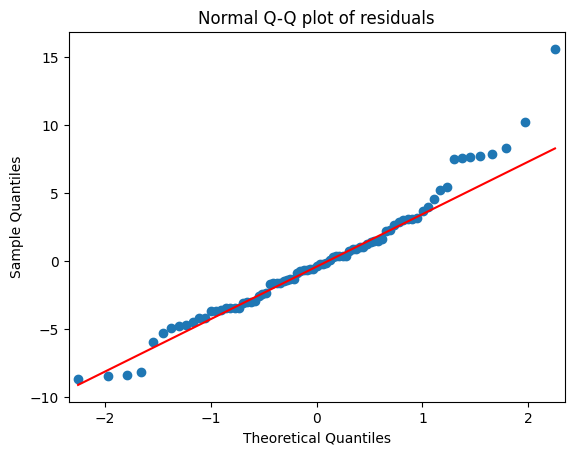

In [13]:
import statsmodels.api as sm    
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

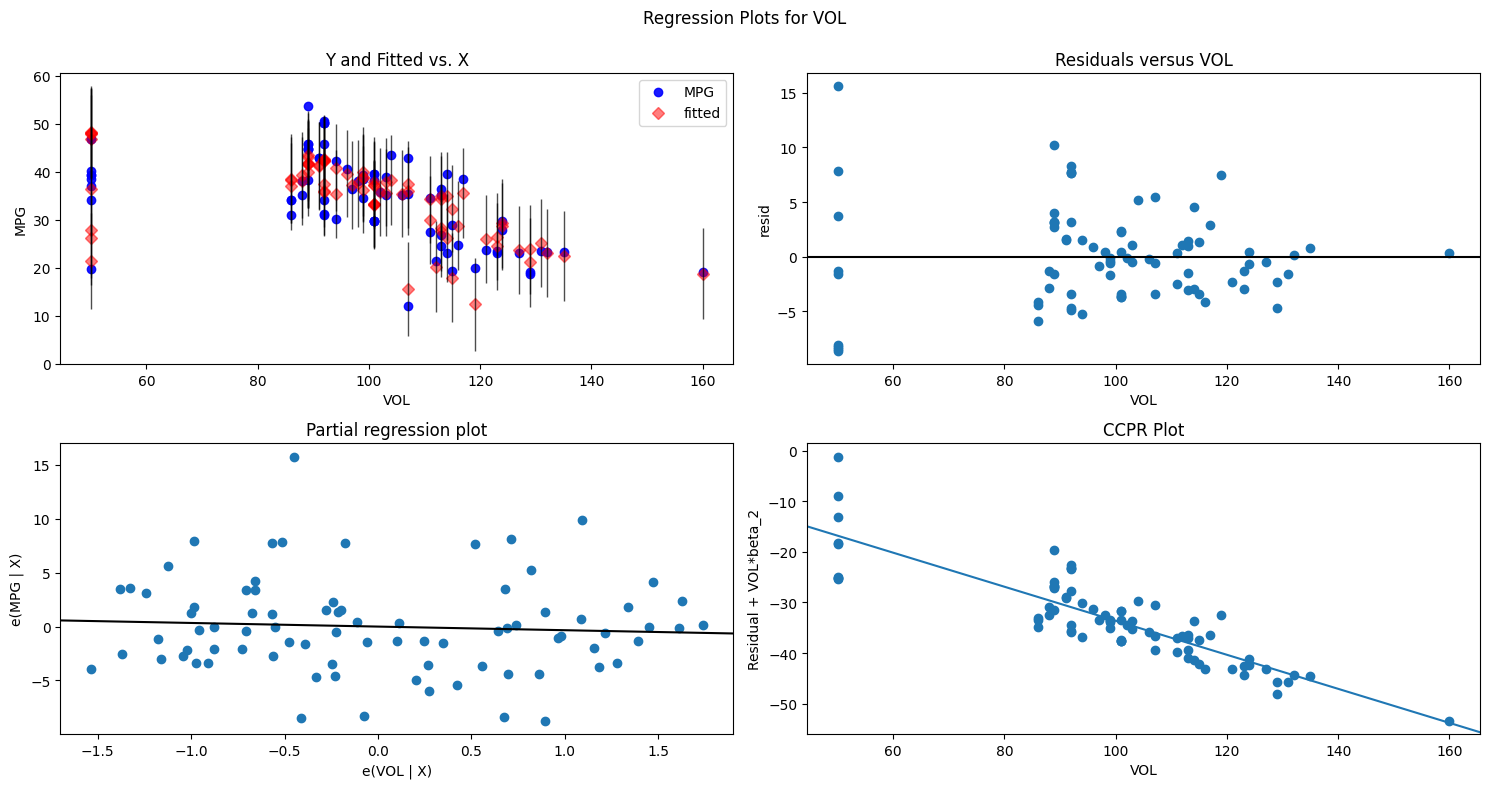

In [14]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "VOL", fig=fig)
plt.show()

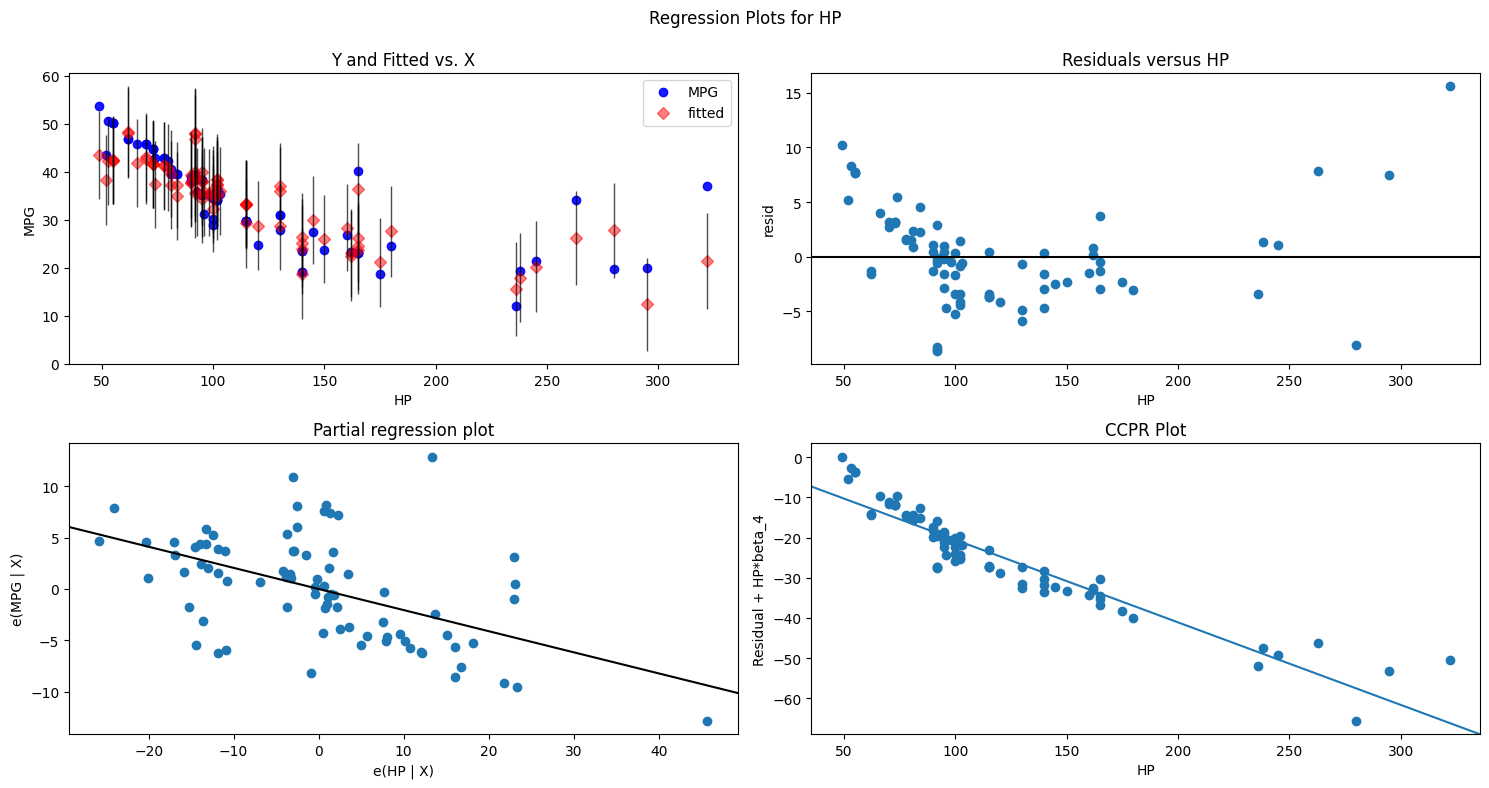

In [15]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

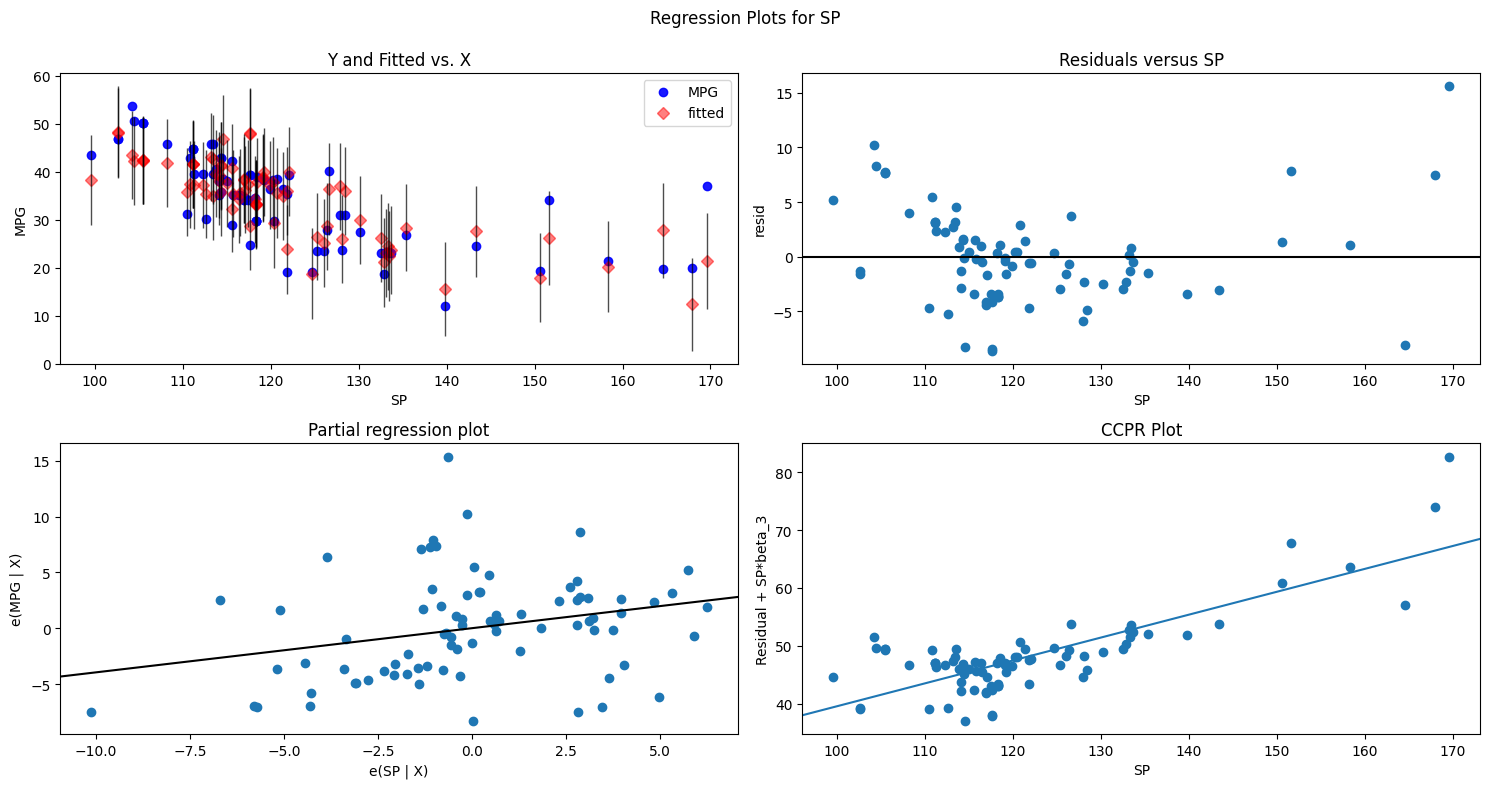

In [16]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "SP", fig=fig)
plt.show()

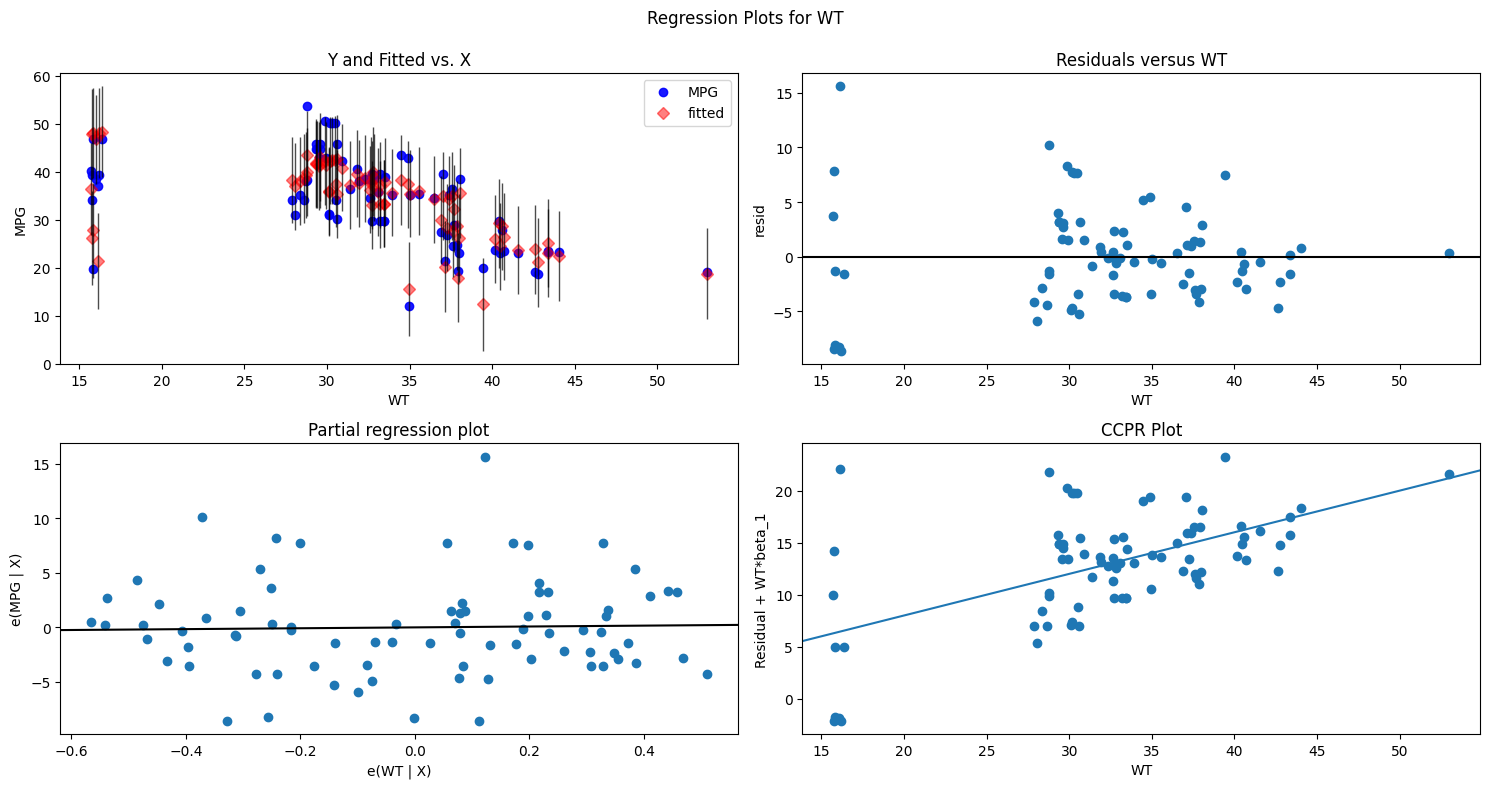

In [17]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "WT", fig=fig)
plt.show()

In [18]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance


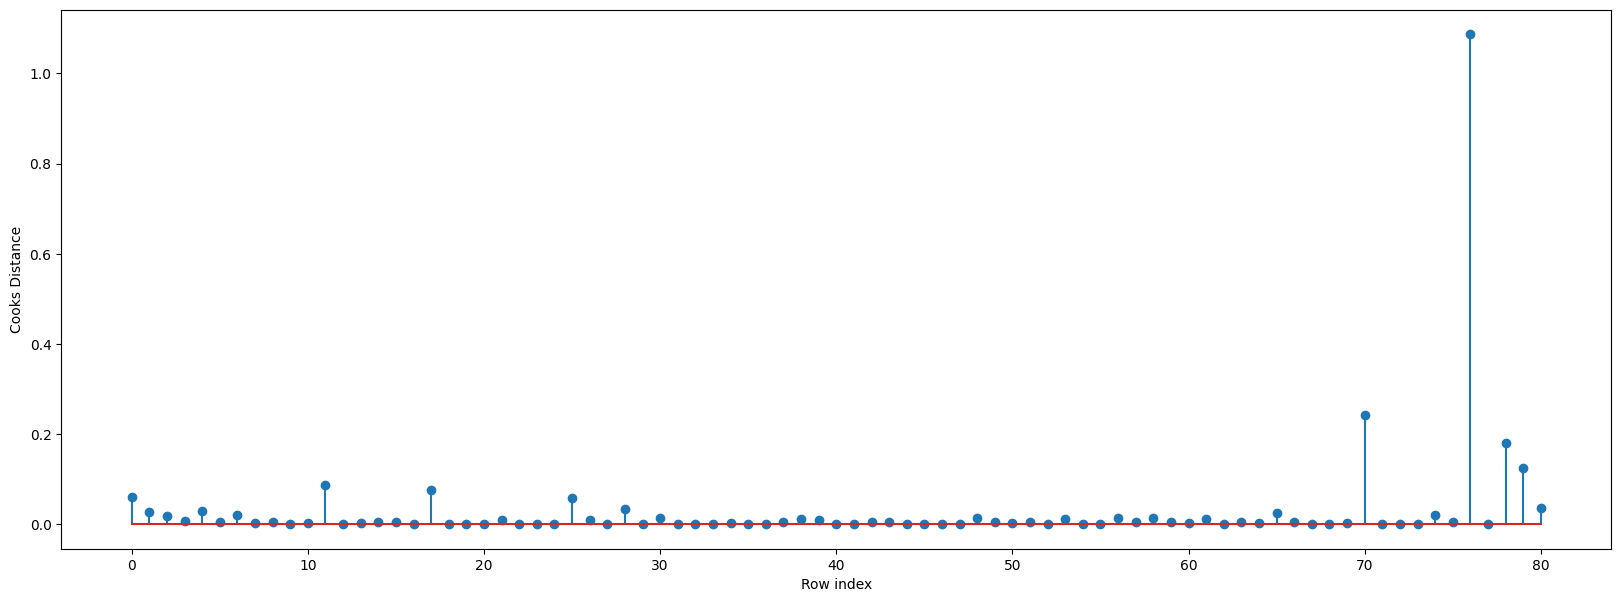

In [19]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(cars)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [20]:
cars1 = cars.drop(cars.index[[70,76]], axis = 0).reset_index()

In [21]:
cars1 = cars1.drop(['index'], axis = 1)

In [2]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

NameError: name 'model' is not defined